In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline

In [24]:
! ls /content/drive/MyDrive/RegressionProject_JADI/

HouseP.csv  Untitled0.ipynb


Importing Data

In [114]:
df = pd.read_csv("/content/drive/MyDrive/RegressionProject_JADI/HouseP.csv")
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [115]:
df["Parking"] = df["Parking"].astype("int") 
df["Warehouse"] = df["Warehouse"].astype("int") 
df["Elevator"] = df["Elevator"].astype("int")
df["Area"] = ["".join(room_.strip().split(",")) for room_ in df["Area"].values]
df["Area"] = df["Area"].astype("int")

In [116]:
q_low = df["Area"].quantile(0.01)
q_hi  = df["Area"].quantile(0.99)

df["Area"] = df[(df["Area"] < q_hi) & (df["Area"] > q_low)]

In [118]:
df.dropna(how='any', inplace=True)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3373 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3373 non-null   object 
 1   Room        3373 non-null   int64  
 2   Parking     3373 non-null   int64  
 3   Warehouse   3373 non-null   int64  
 4   Elevator    3373 non-null   int64  
 5   Address     3373 non-null   object 
 6   Price       3373 non-null   float64
 7   Price(USD)  3373 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 237.2+ KB


Text(0.5, 1.0, 'Room vs Price')

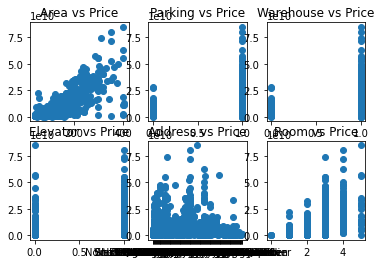

In [80]:
fig, axs = plt.subplots(2,3)
axs[0,0].scatter(df.Area, df.Price)
axs[0,0].set_title("Area vs Price")

axs[0,1].scatter(df.Parking, df.Price)
axs[0,1].set_title("Parking vs Price")

axs[0,2].scatter(df.Warehouse, df.Price)
axs[0,2].set_title("Warehouse vs Price")

axs[1,0].scatter(df.Elevator, df.Price)
axs[1,0].set_title("Elevator vs Price")

axs[1,1].scatter(df.Address, df.Price)
axs[1,1].set_title("Address vs Price")

axs[1,2].scatter(df.Room, df.Price)
axs[1,2].set_title("Room vs Price")

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MaxAbsScaler, PolynomialFeatures

abs_scaled = MaxAbsScaler()
abs_scaled.fit(df[["Area", "Room"]])
df[["Area", "Room"]] = abs_scaled.transform(df[["Area", "Room"]])

#le = LabelEncoder()
#le.fit(df["Address"])
#address_classes = le.classes_
#address_labels = le.transform(df[["Address"]])
#df[["Address"]] =  address_labels

y = df[["Price"]]
x = df.drop(["Price", "Price(USD)"], axis=1)

dummy_address = pd.get_dummies(x, columns=["Address"])
x["Address"] = dummy_address

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.2)


Simple linear reggression

In [136]:
from sklearn import linear_model

smodel = linear_model.LinearRegression()

smodel.fit(xtrain, ytrain)

print("intercept: ", smodel.intercept_)
print("coefficients: ", smodel.coef_)

intercept:  [-6.11146025e+09]
coefficients:  [[ 2.58037070e+10 -7.78373484e+09  5.18130760e+07  8.02977178e+08
   7.00956815e+08  2.58037070e+10]]


In [137]:
from sklearn.metrics import r2_score

ysprediction = smodel.predict(xtest)

acc = r2_score(ytest, ysprediction)
acc

0.6879177894876898